In [1]:
import refexps
from os import listdir, path
from itertools import combinations
from collections import defaultdict
import numpy as np
from scipy import stats
import pickle


dataset_dir = '../En_De_Dataset/All/RefExp'
success_dir = '../En_De_Dataset/All/Success'

In [2]:
def data_values_move(refexps_dir, success_dir, compound = True):
    move_level_data = defaultdict(dict)
    success_types = set()
    for dialogue in listdir(refexps_dir):
        #extract dialogue type
        success_file = dialogue.replace('refexps', 'movesuccess')
        success_file = path.join(success_dir, success_file)
        if dialogue.startswith('FTT'):
            language = 'german'
        else:
            language = 'english'
        dialogue_path = path.join(refexps_dir, dialogue)
        #load referring expressions data
        dialogue_path = refexps.load_data(dialogue_path)
        success_moves = refexps.load_data(success_file)
        #move level
        dialogue_move = refexps.move_level(dialogue_path)
        #iterate over moves
        for move in dialogue_move:
            move_id = dialogue + str(move[0])
            success = success_moves[move[0]]
            refs = move[1]
            if success == 'success':
                success = 'correct'
            if success == 'wrong':
                success = 'incorrect'
            if success == 'na':
                success = 'no_video'
            success_types.add(success)
            if success == 'no_video':
                pass
            else:
                for obj in refs:
                    align_speaker = {}
                    total_n = len(refs[obj])
                    sameform_n =0
                    ignore = 0
                    entropy_speaker = defaultdict(int)
                    total_n_speaker = defaultdict(int)
                    sameform_n_speaker = defaultdict(int)
                    ignore_speaker = defaultdict(int)
                    obj_forms_speaker = defaultdict(dict)
                    obj_forms = defaultdict(int)
                    for ref in refs[obj]:
                        obj_forms[ref[3]] += 1
                        speaker = ref[1]
                        if not obj_forms_speaker[speaker].has_key(ref[3]):
                            obj_forms_speaker[speaker][ref[3]] = 0
                        obj_forms_speaker[speaker][ref[3]] += 1
                        align_speaker[speaker] = 0
                        total_n_speaker[speaker] +=1
                        if refexps.get_previous(ref, refs[obj]) == 'no_previous':
                                ignore += 1
                                ignore_speaker[speaker] += 1
                        else: 
                            if ref[3] == refexps.get_previous(ref, refs[obj])[3]:
                                sameform_n +=1
                                sameform_n_speaker[speaker] += 1
                    sum_forms = sum(obj_forms.values())
                    for form in obj_forms:
                        obj_forms[form] = float(obj_forms[form])/float(sum_forms)
                    obj_forms = obj_forms.values()
                    variation = stats.entropy(obj_forms)
                    move_level_data['variation'][move_id]= (variation, success)
                    ntotal_n = total_n - ignore
                    if ntotal_n != 0:
                        align = float(sameform_n) / ntotal_n
                        move_level_data['alignment'][move_id]= (align, success)
                    for s in align_speaker:
                        ntotal_n = total_n_speaker[s] - ignore_speaker[s]
                        if ntotal_n != 0:
                            align = float(sameform_n_speaker[s]) / ntotal_n 
                            move_level_data['alignment '+s.replace('-utts', '')][move_id] = (align, success )
                    variation_speaker = {}
                    for s in obj_forms_speaker:
                        sum_forms = sum(obj_forms_speaker[s].values())
                        for form in obj_forms_speaker[s]:
                            obj_forms_speaker[s][form] = float(obj_forms_speaker[s][form])/float(sum_forms)
                        obj_forms_speaker[s] = obj_forms_speaker[s].values()
                        variation_speaker[s] = stats.entropy(obj_forms_speaker[s])
                    for s in variation_speaker:
                        move_level_data['variation '+s.replace('-utts', '')][move_id] = (variation, success )
    return move_level_data
move_level_data = data_values_move(dataset_dir, success_dir)
print move_level_data
data_regression = {}
for v in move_level_data:
    data_regression[v] = move_level_data[v].values()
pickle.dump(move_level_data, open('regression_form.p', 'w'))

defaultdict(<type 'dict'>, {'alignment e': {'FTT_2006-06-22pair1_refexps.p(2820, 3210)': (1.0, 'correct'), '20070201_run1pento_nonoise_refexps.p(4, 251)': (0.0, 'correct'), '20070201_run3pento_nonoise_refexps.p(1196, 1407)': (1.0, 'correct'), 'FTT_2006-03-28pair2_refexps.p(2905, 2931)': (1.0, 'not_moved'), '20061123_pento_nonoise_refexps.p(1015, 1397)': (1.0, 'not_moved'), '20061123_pento_nonoise_refexps.p(3754, 3811)': (1.0, 'correct'), '20070201_run1pento_nonoise_refexps.p(1316, 1491)': (0.0, 'correct'), 'FTT_2006-03-28pair2_refexps.p(527, 892)': (0.0, 'not_moved'), 'FTT_2006-03-28pair2_refexps.p(2567, 2617)': (0.0, 'not_moved'), 'FTT_2006-03-27Pair1_refexps.p(3166, 3426)': (1.0, 'not_moved'), 'FTT_2006-03-27Pair1_refexps.p(2082, 2354)': (1.0, 'correct'), '20070201_run3pento_nonoise_refexps.p(854, 922)': (0.0, 'correct'), 'FTT_2006-06-22pair1_refexps.p(261, 332)': (0.0, 'incorrect'), 'FTT_2006-03-28pair2_refexps.p(940, 1355)': (0.0, 'incorrect'), 'FTT_2006-03-28pair2_refexps.p(2618, 

alignment e 105
variation p 152
variation 164
variation e 131
alignment p 78
alignment 113
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10, 11, 11, 11, 11, 12, 12, 12, 14, 18, 21, 28]


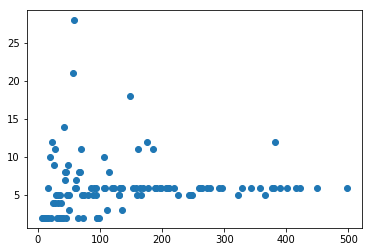

In [44]:
def get_move_len(key_str):
    move_range = eval(key_str[key_str.rfind('('):])
    return move_range[1] - move_range[0]

lens = []

for key, val in move_level_data.iteritems():
    print key, len(val)
    for inner_key, inner_val in val.iteritems():
        lens.append(get_move_len(inner_key))
        
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

lens = [l for l in lens if l < 500]

len_counts = Counter(lens)

print sorted(len_counts.values())


xs, ys = list(zip(*sorted(len_counts.iteritems())))

plt.plot(xs, ys, 'o')

plt.show()